In [1]:
import MDAnalysis
import numpy as np
from DEERPREdict.PRE import PREpredict
from DEERPREdict.DEER import DEERpredict
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

# HIV-1 Protease

Analysis of PDB structures with the 298 K rotamer library (216 conformers)

In [2]:
for pdb in ['3bvb','2bpx','1hhp','1tw7']:
    u = MDAnalysis.Universe('HIV-1PR/PDBs/{:s}.pdb'.format(pdb))
    DEER = DEERpredict(u, residues = [55,55], chains=['A', 'B'],
                       libname='MTSSL 298K UFF r1 CASD')
    DEER.run(output_prefix = 'HIV-1PR/PDBs/r1'+pdb)

Analysis of PDB structures with the 175 K rotamer library (46 conformers)

In [8]:
for pdb in ['3bvb','2bpx','1hhp','1tw7']:
    u = MDAnalysis.Universe('HIV-1PR/PDBs/{:s}.pdb'.format(pdb))
    DEER = DEERpredict(u, residues = [55,55], chains=['A', 'B'])
    DEER.run(output_prefix = 'HIV-1PR/PDBs/'+pdb)

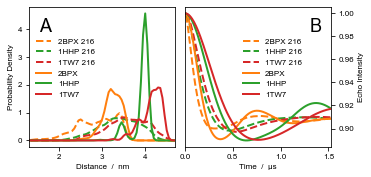

In [20]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(5.2,2.5))

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})

for sim,c in zip(['2bpx','1hhp','1tw7'],[1,2,3]):
    x, y = np.loadtxt('HIV-1PR/PDBs/r1'+sim+'-55-55.dat',unpack=True)
    y = y/np.trapz(y,x)
    sim = sim.upper()
    ax1.plot(x,y,ls='--',label=sim+' 216',color=plt.cm.tab10(c),lw=2)
    
for sim,c in zip(['2bpx','1hhp','1tw7'],[1,2,3]):
    x, y = np.loadtxt('HIV-1PR/PDBs/'+sim+'-55-55.dat',unpack=True)
    y = y/np.trapz(y,x)
    sim = sim.upper()
    ax1.plot(x,y,ls='-',label=sim,color=plt.cm.tab10(c),lw=2)

ax1.set_xlim(1.3,4.7)
ax1.legend(frameon=False, handlelength=1.9,bbox_to_anchor=(0.5,0.3))
ax1.set_ylabel('Probability Density')
ax1.set_xlabel('Distance  /  nm')

a = 0.0922

for sim,c in zip(['2bpx','1hhp','1tw7'],[1,2,3]):
    x, y = np.loadtxt('HIV-1PR/PDBs/r1'+sim+'-55-55_time-domain.dat',unpack=True)
    sim = sim.upper()
    V = 1+a*(y-1)
    ax2.plot(x,V,ls='--',label=sim+' 216',color=plt.cm.tab10(c),lw=2)
    
for sim,c in zip(['2bpx','1hhp','1tw7'],[1,2,3]):
    x, y = np.loadtxt('HIV-1PR/PDBs/'+sim+'-55-55_time-domain.dat',unpack=True)
    sim = sim.upper()
    V = 1+a*(y-1)
    ax2.plot(x,V,ls='-',label=sim,color=plt.cm.tab10(c),lw=2)

ax2.set_ylabel('Echo Intensity')
ax2.set_xlabel('Time  /  μs')
ax2.legend(frameon=False, handlelength=1.9, bbox_to_anchor=(0.35,0.3))
ax2.set_xlim(0,1.53)
ax1.annotate('A',xy=(.07,.82),xycoords='axes fraction',fontsize=18)
ax2.annotate('B',xy=(.85,.82),xycoords='axes fraction',fontsize=18)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')
plt.tight_layout(w_pad=.5)
plt.savefig('HIV-1PR_pdb_46vs216.pdf')

Analysis of unbiased and RDC-restrained simulations (175 K rotamer library)

In [15]:
for sim in ['unbiased','rdc']:
    u = MDAnalysis.Universe('HIV-1PR/sims/{:s}.pdb'.format(sim),
                            'HIV-1PR/sims/{:s}.xtc'.format(sim))
    DEER = DEERpredict(u, residues = [55,55], chains=['A', 'B'], 
                       temperature = 298, z_cutoff = 0.05)
    DEER.run(output_prefix='HIV-1PR/sims/{:s}'.format(sim))

Analysis of unbiased and RDC-restrained simulations (298 K rotamer library)

In [16]:
for sim in ['unbiased','rdc']:
    u = MDAnalysis.Universe('HIV-1PR/sims/{:s}.pdb'.format(sim),
                            'HIV-1PR/sims/{:s}.xtc'.format(sim))
    DEER = DEERpredict(u, residues = [55,55], chains=['A', 'B'], 
                       temperature = 298, z_cutoff = 0.05,libname='MTSSL 298K UFF r1 CASD')
    DEER.run(output_prefix='HIV-1PR/sims/rw_{:s}'.format(sim))

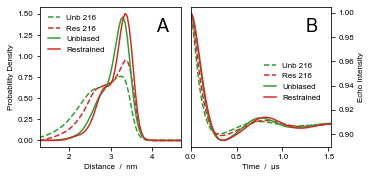

In [19]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(5.2,2.5))

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})

for sim,c in zip(['Unbiased','rdc'],[2,3]):
    x, y = np.loadtxt('HIV-1PR/sims/r1_'+sim+'-55-55.dat',unpack=True)
    y = y/np.trapz(y,x)
    sim = 'Restrained' if sim=='rdc' else sim
    sim = 'PDB 3BVB' if sim=='3bvb' else sim
    ax1.plot(x,y,ls='--',label=sim.capitalize()[:3]+' 216',color=plt.cm.tab10(c),lw=1.5)
    
for sim,c in zip(['Unbiased','rdc'],[2,3]):
    x, y = np.loadtxt('HIV-1PR/sims/'+sim+'-55-55.dat',unpack=True)
    y = y/np.trapz(y,x)
    sim = 'Restrained' if sim=='rdc' else sim
    sim = 'PDB 3BVB' if sim=='3bvb' else sim
    ax1.plot(x,y,ls='-',label=sim.capitalize(),color=plt.cm.tab10(c),lw=1.5)

ax1.set_xlim(1.3,4.7)
ax1.legend(frameon=False, handlelength=1.5)
ax1.set_ylabel('Probability Density')
ax1.set_xlabel('Distance  /  nm')

for sim,c in zip(['Unbiased','rdc'],[2,3]):
    x, y = np.loadtxt('HIV-1PR/sims/r1_'+sim+'-55-55_time-domain.dat',unpack=True)
    sim = 'Restrained' if sim=='rdc' else sim
    V = 1+0.0922*(y-1)
    ax2.plot(x,V,ls='--',label=sim[:3]+' 216',color=plt.cm.tab10(c),lw=1.5)
    
for sim,c in zip(['Unbiased','rdc'],[2,3]):
    x, y = np.loadtxt('HIV-1PR/sims/'+sim+'-55-55_time-domain.dat',unpack=True)
    sim = 'Restrained' if sim=='rdc' else sim
    V = 1+0.0922*(y-1)
    ax2.plot(x,V,ls='-',label=sim,color=plt.cm.tab10(c),lw=1.5)

ax2.set_ylabel('Echo Intensity')
ax2.set_xlabel('Time  /  μs')
ax2.legend(frameon=False, handlelength=1.5,bbox_to_anchor=(0.47,0.28))
ax2.set_xlim(0,1.53)
ax1.annotate('A',xy=(.82,.82),xycoords='axes fraction',fontsize=18)
ax2.annotate('B',xy=(.82,.82),xycoords='axes fraction',fontsize=18)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')
plt.tight_layout(w_pad=.5)
plt.savefig('HIV-1PR_sim_46vs216.pdf')

# T4 Lysozyme

Analysis of the PDBs (175 K library)

In [15]:
for pdb in ['3dmv','2lcb','2lc9']:
    u = MDAnalysis.Universe('T4L/PDBs/{:s}.pdb'.format(pdb))
    for residues in [[89, 109],[109, 140]]:
        DEER = DEERpredict(u, residues = residues, temperature = 298, z_cutoff = 0.05)
        DEER.run(output_prefix = 'T4L/PDBs/{:s}'.format(pdb))

Analysis of the PDBs (298 K library)

In [27]:
for pdb in ['3dmv','2lcb','2lc9']:
    u = MDAnalysis.Universe('T4L/PDBs/{:s}.pdb'.format(pdb))
    for residues in [[89, 109],[109, 140]]:
        DEER = DEERpredict(u, residues = residues, temperature = 298, 
                           z_cutoff = 0.05, libname='MTSSL 298K UFF r1 CASD')
        DEER.run(output_prefix = 'T4L/PDBs/r1_{:s}'.format(pdb))

Analysis of metadynamics trajectories

In [5]:
if os.path.isfile('T4L/sims/MTDsingle.xtc'):
    bias = np.loadtxt('T4L/sims/MTDbias_single.dat')
    u = MDAnalysis.Universe('T4L/sims/MTDsingle.pdb','T4L/sims/MTDsingle.xtc')
    print(u.trajectory.n_frames)
    for residues in [[89, 109],[109, 140]]:
        DEER = DEERpredict(u, residues = residues, 
                           temperature = 298, z_cutoff = 0.05)
        DEER.run(output_prefix = 'T4L/sims/single', weights=np.exp(bias/(.298*8.3145)))

6670


In [6]:
if os.path.isfile('T4L/sims/MTDtriple.xtc'):
    bias = np.loadtxt('T4L/sims/MTDbias_triple.dat')
    u = MDAnalysis.Universe('T4L/sims/MTDtriple.pdb','T4L/sims/MTDtriple.xtc')
    print(u.trajectory.n_frames)
    for residues in [[89, 109],[109, 140]]:
        DEER = DEERpredict(u, residues = residues,
                           temperature = 298, z_cutoff = 0.05)
        DEER.run(output_prefix = 'T4L/sims/triple', weights=np.exp(bias/(.298*8.3145)))

6868


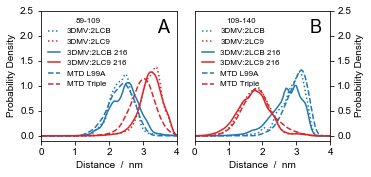

In [27]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(5.2,2.5))

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})

for ax,residues in zip(axes,[[89, 109],[109, 140]]):
    
    xG, yG = np.loadtxt('T4L/PDBs/3dmv-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    xE, yE = np.loadtxt('T4L/PDBs/2lcb-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    lc = yG*.97+yE*.03
    lc /= np.trapz(lc,xG)
    ax.plot(xG,lc,color=plt.cm.tab10(0),ls=':',label='3DMV:2LCB',lw=1.5)
    
    xG, yG = np.loadtxt('T4L/PDBs/3dmv-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    xE, yE = np.loadtxt('T4L/PDBs/2lc9-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    lc = yG*.04+yE*.96
    lc /= np.trapz(lc,xG)
    ax.plot(xG,lc,color=plt.cm.tab10(3),ls=':',label='3DMV:2LC9',lw=1.5)
    
    xG, yG = np.loadtxt('T4L/PDBs/r1_3dmv-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    xE, yE = np.loadtxt('T4L/PDBs/r1_2lcb-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    lc = yG*.97+yE*.03
    lc /= np.trapz(lc,xG)
    ax.plot(xG,lc,color=plt.cm.tab10(0),ls='-',label='3DMV:2LCB 216',lw=1.5)
    
    xG, yG = np.loadtxt('T4L/PDBs/r1_3dmv-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    xE, yE = np.loadtxt('T4L/PDBs/r1_2lc9-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    lc = yG*.04+yE*.96
    lc /= np.trapz(lc,xG)
    ax.plot(xG,lc,color=plt.cm.tab10(3),ls='-',label='3DMV:2LC9 216',lw=1.5)
    
    xS, yS = np.loadtxt('T4L/sims/single-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    lc = yS/np.trapz(yS,xS)
    ax.plot(xS,lc,color=plt.cm.tab10(0),ls='--',label=r'MTD L99A',lw=1.5)
    
    xS, yS = np.loadtxt('T4L/sims/triple-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    lc = yS/np.trapz(yS,xS)
    ax.plot(xS,lc,color=plt.cm.tab10(3),ls='--',label=r'MTD Triple',lw=1.5)
    
    ax.set_xlim(0,4)
    ax.set_ylim(-.1,2.5)
    ax.legend(frameon=False,title='{:d}-{:d}'.format(residues[0],residues[1]),
              handlelength=1.5,loc='upper left')
    ax.set_ylabel('Probability Density')
    ax.set_xlabel('Distance  /  nm')
    
axes[0].annotate('A',xy=(.85,.83),xycoords='axes fraction',fontsize=18)
axes[1].annotate('B',xy=(.85,.83),xycoords='axes fraction',fontsize=18)
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.set_ticks_position('right')
plt.tight_layout(w_pad=1.5)
plt.savefig('T4L_pdb_46vs216.pdf')

# Acyl-CoA-Binding Protein

175 K rotamer library (46 conformers)

In [17]:
u = MDAnalysis.Universe('ACBP/1nti.pdb')
for res in [17,36,46,65,86]:
    PRE = PREpredict(u, res, temperature = 298, Cbeta = False, 
                     atom_selection = 'H')
    PRE.run(tau_c = 2e-09, tau_t = 2*1e-10, 
            delay = 1e-2, r_2 = 12.6, wh = 750, output_prefix = 'ACBP/res')

298 K rotamer library (216 conformers)

In [ ]:
for res in [17,36,46,65,86]:
    PRE = PREpredict(u, res, temperature = 298, Cbeta = False, 
                     atom_selection = 'H', libname='MTSSL 298K UFF r1 CASD')
    PRE.run(tau_c = 2e-09, tau_t = 2*1e-10, 
            delay = 1e-2, r_2 = 12.6, wh = 750, output_prefix = 'ACBP/r1res')

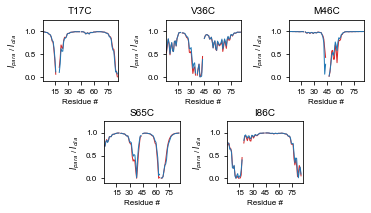

In [21]:
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=plt.figure(figsize=(5.2,3)))
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

axes = [ax1,ax2,ax3,ax4,ax5]

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})

for ax,label,res in zip(axes,[17,36,46,65,86],'TVMSI'):
    resnums, calcPREs, _ = np.loadtxt('ACBP/res-{:d}.dat'.format(label),unpack=True)
    ax.plot(resnums, calcPREs, color=plt.cm.tab10(3),lw=1)
    resnums, calcPREs, _ = np.loadtxt('ACBP/r1res-{:d}.dat'.format(label),unpack=True)
    ax.plot(resnums, calcPREs, color=plt.cm.tab10(0),lw=1)
    ax.set_ylabel('$I_{para}$ / $I_{dia}$')
    ax.set_ylim(-.1,1.25)
    ax.set_xlim(1,resnums.size+1)
    ax.set_xticks(range(0,resnums.size+1,15)[1:])
    ax.set_xlabel('Residue #')
    ax.set_title(res+str(label)+'C',fontsize=10)
plt.tight_layout(w_pad=1.5,h_pad=0.5)
plt.savefig('ACBP_46vs216.pdf')

Steric partition functions –– 175 K rotamer library (46 conformers)

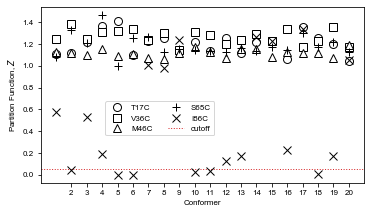

In [19]:
fig = plt.figure(figsize=(5.2,3))
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})
for label,res,m in zip([17,36,46,65,86],'TVMSI','os^+x'):
    z = np.loadtxt('ACBP/res-Z-{:d}.dat'.format(label))
    plt.plot(range(1,21),z,marker=m,lw=0,color='k',ms=8,mfc='w',label=res+str(label)+'C')
plt.xticks(range(2,21,1),['{:d}'.format(i) for i in range(2,21,1)])
plt.hlines(0.05,0,21,ls=':',lw=1,color=plt.cm.tab10(3),label='cutoff')
plt.legend(ncol=2,loc=(.2,.27))
plt.xlim(0,21)
plt.xlabel('Conformer')
plt.ylabel('Partition Function, $Z$')
plt.tight_layout()

Steric partition functions –– 298 K rotamer library (216 conformers)

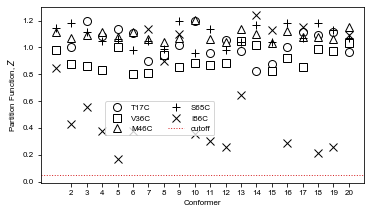

In [20]:
fig = plt.figure(figsize=(5.2,3))
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})
for label,res,m in zip([17,36,46,65,86],'TVMSI','os^+x'):
    z = np.loadtxt('ACBP/r1res-Z-{:d}.dat'.format(label))
    plt.plot(range(1,21),z,marker=m,lw=0,color='k',ms=8,mfc='w',label=res+str(label)+'C')
plt.xticks(range(2,21,1),['{:d}'.format(i) for i in range(2,21,1)])
plt.hlines(0.05,0,21,ls=':',lw=1,color=plt.cm.tab10(3),label='cutoff')
plt.legend(ncol=2,loc=(.2,.27))
plt.xlim(0,21)
plt.xlabel('Conformer')
plt.ylabel('Partition Function, $Z$')
plt.tight_layout()

Distributions of the steric partition functions for MD trajectories of HIV-1PR and T4L 

2.3976023976023977
2.5974025974025974
2.507496251874063
1.4705882352941175


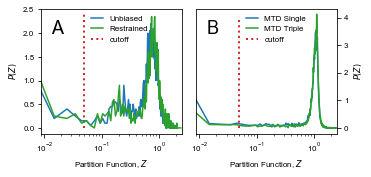

In [120]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(5.2,2.5))
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})

for sim,c in zip(['Unbiased','rdc'],[0,2]):
    z = np.loadtxt('HIV-1PR/sims/'+sim+'-Z-55-55.dat')
    print((z.flatten()<0.05).sum()/z.size*100)
    h,bins = np.histogram(z.flatten(),bins=np.arange(0,z.max(),0.01),density=True)
    sim = 'Restrained' if sim=='rdc' else sim
    axes[0].plot(bins[:-1]+.5*(bins[1]-bins[0]),h,label=sim,color=plt.cm.tab10(c))
axes[0].set_xscale('log')
axes[0].vlines(0.05,0,2.4,ls=':',lw=2,color=plt.cm.tab10(3),label='cutoff')
axes[0].legend(frameon=False,loc=(.33,.7),handlelength=1.5)
axes[0].set_xlim(0.009,2.5)
axes[0].set_ylabel('$P(Z)$')
axes[0].set_xlabel('Partition Function, $Z$')

for sim,c in zip(['single','triple'],[0,2]):
    z = np.empty(0)
    for res in [[89, 109],[109, 140]]:
        z = np.append(z,np.loadtxt('T4L/sims/{:s}-Z-{:d}-{:d}.dat'.format(sim,res[0],res[1])).flatten())
    h,bins = np.histogram(z,bins=np.arange(0,z.max(),0.01),density=True)
    axes[1].plot(bins[:-1]+.5*(bins[1]-bins[0]),h,
                 label='MTD '+sim.capitalize(),color=plt.cm.tab10(c))
    print((z.flatten()<0.05).sum()/z.size*100)
axes[1].set_xscale('log')
axes[1].vlines(0.05,0,4,ls=':',lw=2,color=plt.cm.tab10(3),label='cutoff')
axes[1].legend(frameon=False,loc=(.33,.7),handlelength=1.5)
axes[1].set_xlim(0.009,2.5)
axes[1].set_ylabel('$P(Z)$')
axes[1].set_xlabel('Partition Function, $Z$')
axes[0].annotate('A',xy=(.07,.8),xycoords='axes fraction',fontsize=18)
axes[1].annotate('B',xy=(.07,.8),xycoords='axes fraction',fontsize=18)
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.set_ticks_position('right')
plt.tight_layout()

Influence of the $Z$ cutoff on DEER and PRE predictions

In [381]:
u = MDAnalysis.Universe('ACBP/1nti.pdb')
for z_cutoff in [0.05,0.5,0.8]:
    PRE = PREpredict(u, 86, temperature = 298, Cbeta = False, atom_selection = 'H', z_cutoff = z_cutoff)
    PRE.run(output_prefix = 'ACBP/calcPREs/res{:g}'.format(z_cutoff), tau_c = 2e-09,
            tau_t = 2*1e-10, delay = 1e-2, r_2 = 12.6, wh = 750)

In [383]:
for z_cutoff in [0.05,0.5,0.8]:
    u = MDAnalysis.Universe('HIV-1PR/sims/rdc.pdb'.format(sim),'HIV-1PR/sims/rdc.xtc'.format(sim))
    DEER = DEERpredict(u, residues = [55,55], chains=['A', 'B'], temperature = 298, z_cutoff = z_cutoff)
    DEER.run(output_prefix='HIV-1PR/sims/rdc{:g}'.format(z_cutoff))

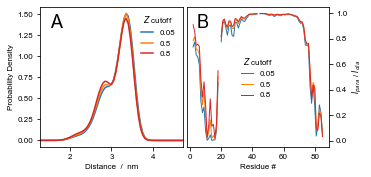

In [385]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(5.2,2.5))

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})

for z_cutoff,c in zip(['0.05','0.5','0.8'],[0,1,3]):
    x, y = np.loadtxt('HIV-1PR/sims/rdc'+z_cutoff+'-55-55.dat',unpack=True)
    y = y/np.trapz(y,x)
    ax1.plot(x,y,ls='-',label=z_cutoff,color=plt.cm.tab10(c),lw=1.5)
    
ax1.set_xlim(1.3,4.7)
ax1.legend(frameon=False, handlelength=1.5,title='$Z$ cutoff')
ax1.set_ylabel('Probability Density')
ax1.set_xlabel('Distance  /  nm')

for z_cutoff,c in zip(['0.05','0.5','0.8'],[0,1,3]):
    resnums, calcPREs, _ = np.loadtxt('ACBP/calcPREs/res{:s}-86.dat'.format(z_cutoff),unpack=True)
    plt.plot(resnums, calcPREs,lw=1,label=z_cutoff,color=plt.cm.tab10(c))
ax2.legend(frameon=False, handlelength=1.5,title='$Z$ cutoff',loc='center')
ax2.set_xlabel('Residue #')
ax2.set_ylabel('$I_{para}$ / $I_{dia}$')
ax1.annotate('A',xy=(.07,.85),xycoords='axes fraction',fontsize=18)
ax2.annotate('B',xy=(.07,.85),xycoords='axes fraction',fontsize=18)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')
plt.tight_layout(w_pad=.5)
plt.savefig('figS1.pdf')